# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

Вариант 4 

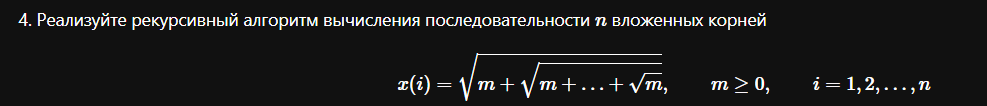

### Реализация алгоритма

#### Задача 1

In [ ]:
def nested_root_recursive(n, m):
    if n == 1:
        return m ** 0.5
    else:
        return (m + nested_root(n - 1, m)) ** 0.5
print(nested_root(4,8))

#### Задача 2

In [ ]:
def nested_root_non_recursive(n, m):
    res = m ** 0.5
    for i in range(2, n + 1):
        res = (m + res) ** 0.5
    return res
print(nested_root(4,8))

#### Блок схема алгоритма


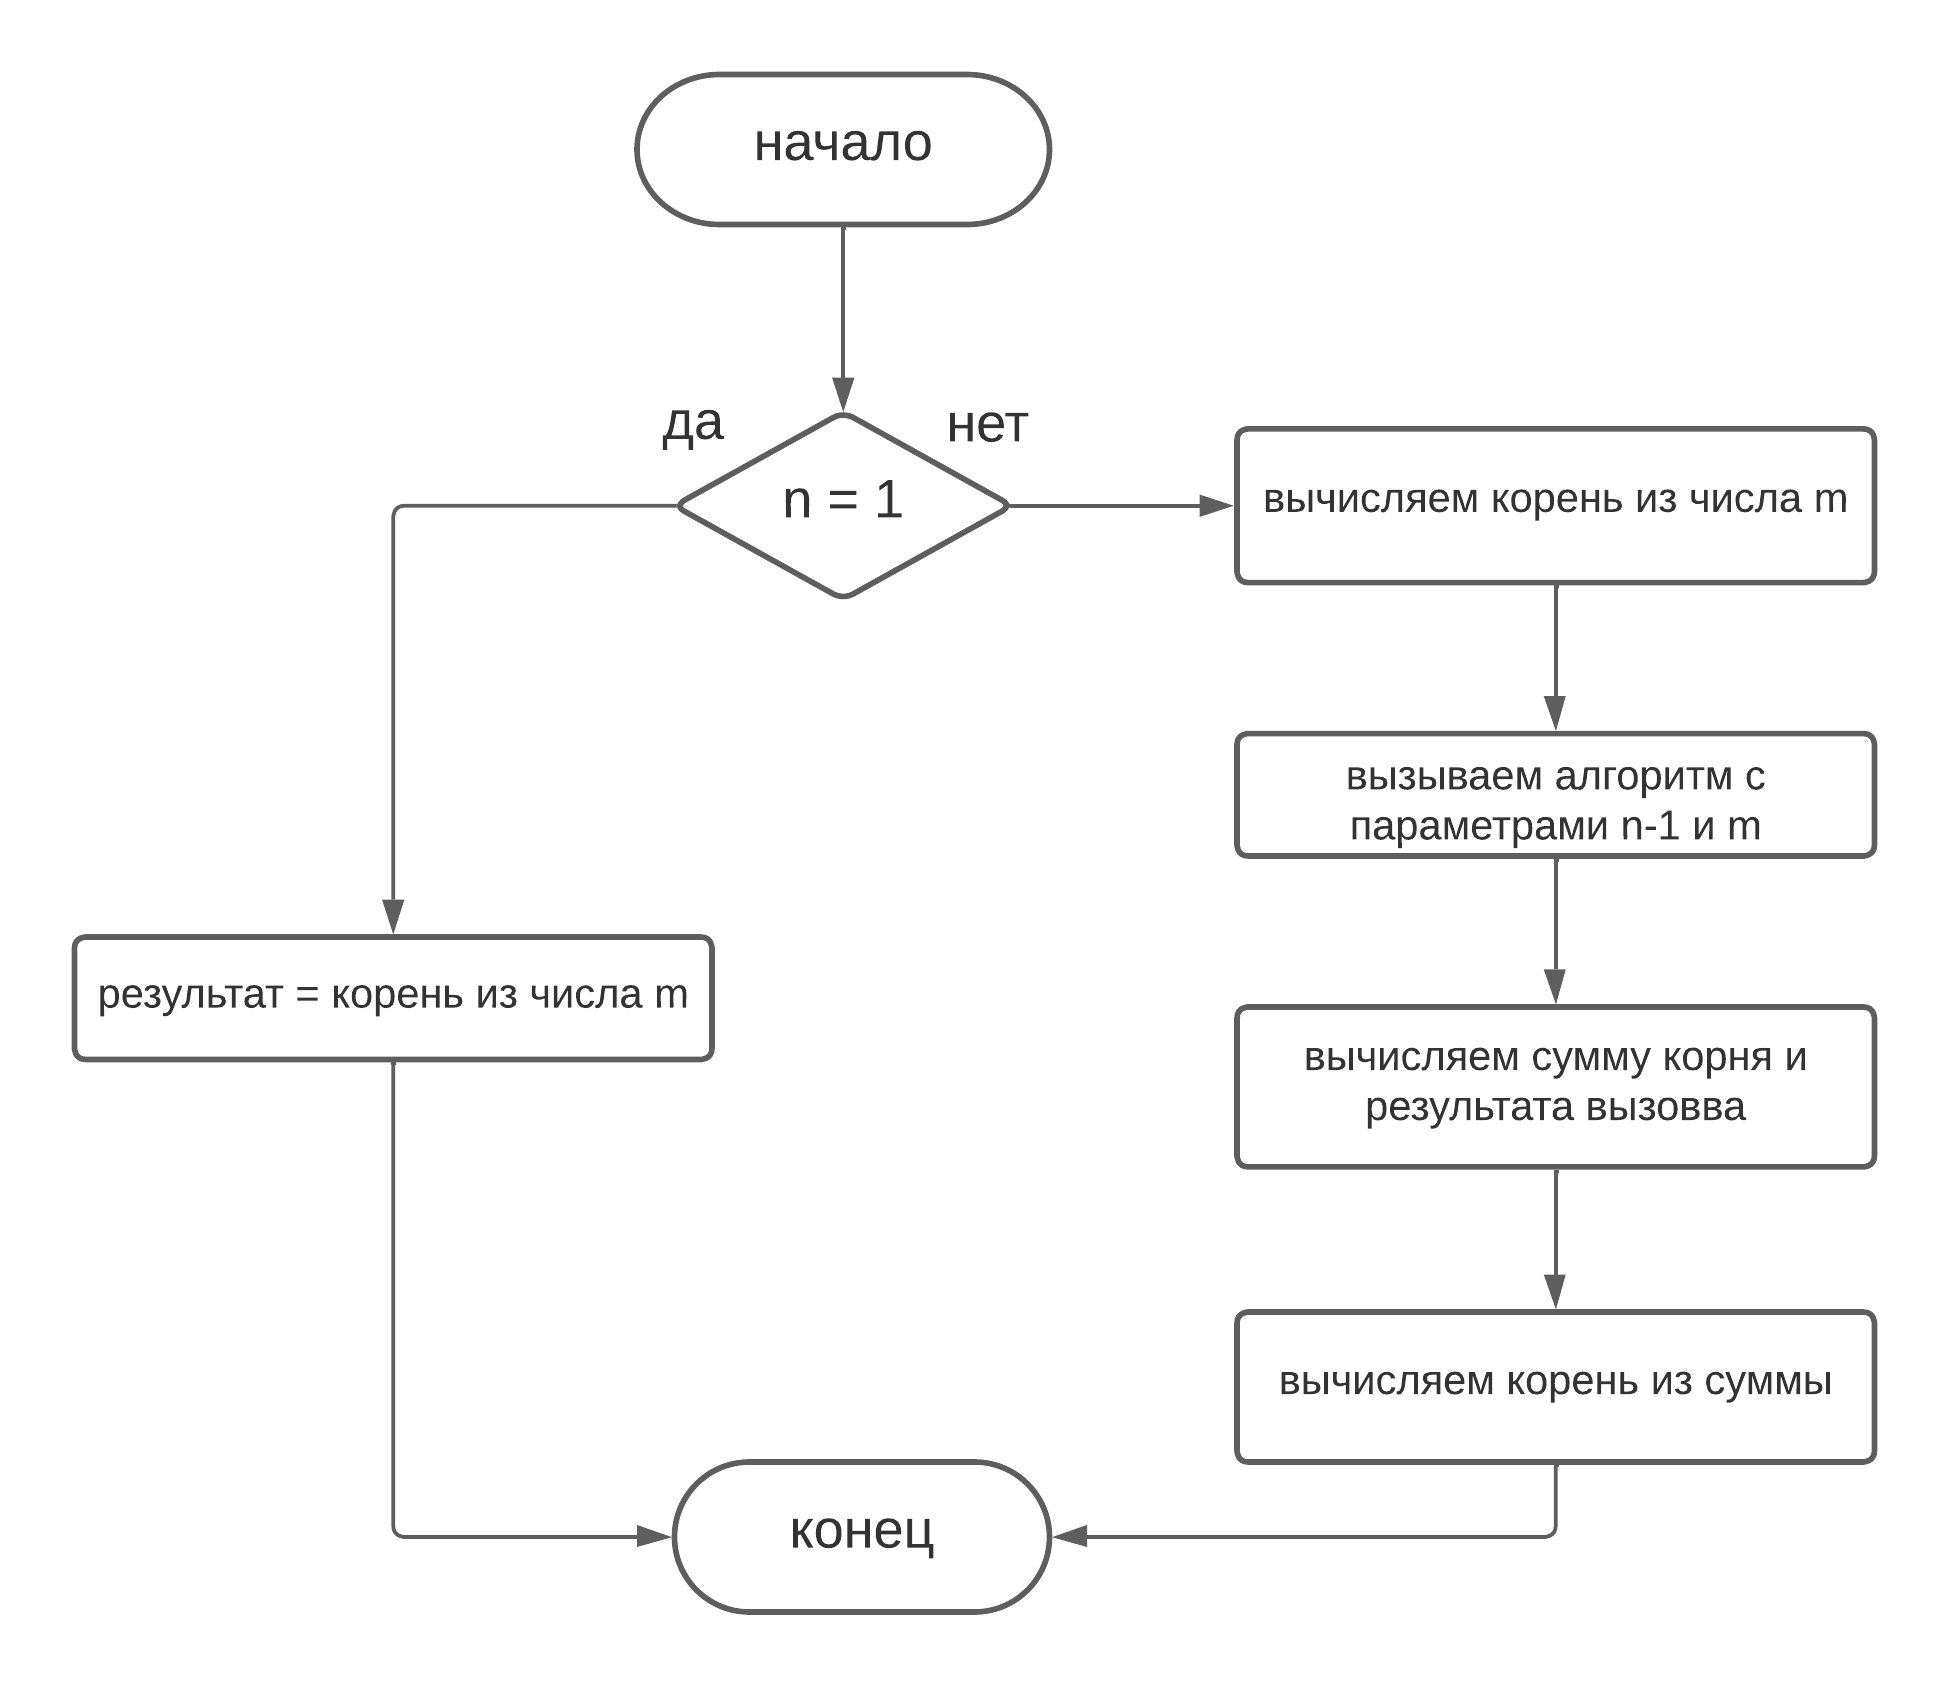

### Оценка алгоритма 

Размерность задачи для данного алгоритма связана с количеством вложенных корней n и значением m. При увеличении n и/или m, вероятность переполнения стека вызовов рекурсии возрастает.

Однако, для данного алгоритма переполнение стека вызовов может произойти при достаточно больших значениях n и m. В частности, при использовании стандартной реализации стека вызовов в Python, максимальное значение n может быть порядка 1000-2000, в зависимости от версии и настроек интерпретатора.

Таким образом, верхняя граница размерности задачи для данного алгоритма, при которой не происходит переполнения стека вызовов, может быть порядка нескольких тысяч, но точная оценка зависит от конкретных условий использования алгоритма.

### Модернизация алгоритма

In [ ]:
# использвуем декоратор memoized
def memoized(func):
    cache = {}
    def wrapped(*args):
        if args not in cache:
            cache[args] = func(*args)
        return cache[args]
    return wrapped

@memoized
def nested_root_modernized(n, m):
    if n == 1:
        return m ** 0.5
    else:
        return (m + nested_root(n - 1, m)) ** 0.5
print(nested_root(3,23))

In [ ]:
# не используем memoized 
def nested_root_with_hands(n, m, cache={}):
    if n == 1:
        return m ** 0.5
    elif n in cache:
        return cache[n]
    else:
        result = (m + nested_root_with_hands(n - 1, m, cache)) ** 0.5
        cache[n] = result
        return result
print(nested_root_with_hands(3,8))

### Cравнение

In [ ]:
import time

def measure_time(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return result, end - start

m = 100
n = 232424

# Рекурсивная реализация
result_rec, time_rec = measure_time(nested_root_recursive, m, n)

# Рекурсивная реализация
result_non_rec, time_non_rec = measure_time(nested_root_non_recursive, m, n)

# Модернизированная реализация с помощью декоратора memoized
result_mod, time_mod = measure_time(nested_root_modernized, m, n)

# Модернизация реализованная в ручную 
result_mod_with_hands, time_mod_with_hands = measure_time(nested_root_modernized, m, n)

print(f"Рекурсивная реализация: {result_rec}, время: {time_rec}")
print(f"Рекурсивная реализация: {result_non_rec}, время: {time_non_rec}")
print(f"Модернизированная реализация с декортаором: {result_mod}, время: {time_mod}")
print(f"Модернизированная реализация вручную: {result_mod_with_hands}, время: {time_mod_with_hands}")